<div style="line-height:1.2;">

<h1 style="color:#FF7C00; margin-bottom: 0.3em;">Tensorflow basics 1</h1>

<h4 style="margin-top: 0.3em; margin-bottom: 1em;">Tensors and Neural Networks examples.</h4>

<div style="line-height:1.4; margin-bottom: 0.5em;">
    <h3 style="color: lightblue; display: inline; margin-right: 0.5em;">Keywords:</h3> 
    Sequential + tf.config + tf.gather + plt rcParams
</div>

</div>

In [2]:
""" Set the environment variable "TF_CPP_MIN_LOG_LEVEL" that controls the amount of logging output generated by TensorFlow. 
Only output error messages to the console, suppressing warnings and informational messages. 
"""
import os 
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [3]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

<h2 style="color:#FF7C00  ">  Tensors creation </h2>

In [60]:
t0 = tf.constant(4, shape=(1, 1), dtype=tf.float32)
t1 = tf.constant([[1., 2., 3.],
                [4., 5., 6.]])
t2 = tf.constant([[1, 2, 3], [4, 5, 6]], shape=(2, 3))
t3 = tf.eye(3)
t4 = tf.ones((4, 3))
t5 = tf.zeros((3, 2, 5))
t6 = tf.random.uniform((2, 2), minval=0, maxval=1)
t7 = tf.random.normal((3, 3), mean=0, stddev=1)
t8 = tf.range(21)
t9 = tf.range(start=0, limit=10, delta=2)
t10 = tf.convert_to_tensor([1, 2, 3])

print("--> t1")
print(t1)
print("--> t2")
print(t2)
print("--> t3")
print(t3)
print("--> t4")
print(t4)
print("--> t5")
print(t5)
print("--> t6")
print(t6)
print("--> tf7")
print(tf.cast(t7, dtype=tf.float64))
print("--> t8")
print(t8)
print("--> t9")
print(t9)

t0.shape

--> t1
tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
--> t2
tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)
--> t3
tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)
--> t4
tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(4, 3), dtype=float32)
--> t5
tf.Tensor(
[[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]], shape=(3, 2, 5), dtype=float32)
--> t6
tf.Tensor(
[[0.7980759  0.8269317 ]
 [0.48692012 0.25827146]], shape=(2, 2), dtype=float32)
--> tf7
tf.Tensor(
[[ 1.51809871 -0.98699886 -0.91705543]
 [ 0.17526226  1.31574714  0.01230654]
 [ 0.9324159  -0.62453979 -0.64259213]], shape=(3, 3), dtype=float64)
--> t8
tf.Tensor([ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20], shape=(21,), dtype=int32)
--> t9
tf.Tensor([0 2 4 6 8], shape=(5,), dtype=int32)


TensorShape([1, 1])

### => Math

tf.Variable is used to store model weights (or other mutable state) in TensorFlow, since tf.Tensor objects are immutable. 

In [61]:
var = tf.Variable([0.0, 0.0, 0.0])
var.assign([1, 2, 3])
var.assign_add([1, 1, 1])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>

In [62]:
tf.reduce_sum(t0)

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

In [4]:
x = tf.constant([1, 2, 3, 3, 9, 3, 5, 6, 1, 6])
y = tf.constant([9, 8, 7, 0, 2, 5, 11, 4, 3, 5])

z1 = tf.add(x, y)
z2 = x + y

z1, z2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 10, 10,  3, 11,  8, 16, 10,  4, 11], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 10, 10,  3, 11,  8, 16, 10,  4, 11], dtype=int32)>)

In [5]:
z3 = tf.subtract(x, y)
z4 = x - y

z3, z4

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([-8, -6, -4,  3,  7, -2, -6,  2, -2,  1], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([-8, -6, -4,  3,  7, -2, -6,  2, -2,  1], dtype=int32)>)

In [6]:
z5 = tf.divide(x, y)
z6 = x / y

z5, z6

(<tf.Tensor: shape=(10,), dtype=float64, numpy=
 array([0.11111111, 0.25      , 0.42857143,        inf, 4.5       ,
        0.6       , 0.45454545, 1.5       , 0.33333333, 1.2       ])>,
 <tf.Tensor: shape=(10,), dtype=float64, numpy=
 array([0.11111111, 0.25      , 0.42857143,        inf, 4.5       ,
        0.6       , 0.45454545, 1.5       , 0.33333333, 1.2       ])>)

In [7]:
z7 = tf.multiply(x, y)
z8 = x * y

z7, z8

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 9, 16, 21,  0, 18, 15, 55, 24,  3, 30], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 9, 16, 21,  0, 18, 15, 55, 24,  3, 30], dtype=int32)>)

In [8]:
z9 = tf.tensordot(x, y, axes=1)

z10 = x ** 5

z9, z10

(<tf.Tensor: shape=(), dtype=int32, numpy=191>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=
 array([    1,    32,   243,   243, 59049,   243,  3125,  7776,     1,
         7776], dtype=int32)>)

In [9]:
x = tf.random.normal((2, 3))
y = tf.random.normal((3, 2))
z = tf.matmul(x, y)
z11 = x @ y

z11

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.41328526,  1.7902864 ],
       [ 0.4408375 , -2.4375756 ]], dtype=float32)>

### => Indexing

In [10]:
x = tf.constant([0, 1, 1, 2, 3, 1, 2, 3])
print(x[:])
print(x[1:])
print(x[1:3])
print(x[::2])
print(x[::-1])

tf.Tensor([0 1 1 2 3 1 2 3], shape=(8,), dtype=int32)
tf.Tensor([1 1 2 3 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([1 1], shape=(2,), dtype=int32)
tf.Tensor([0 1 3 2], shape=(4,), dtype=int32)
tf.Tensor([3 2 1 3 2 1 1 0], shape=(8,), dtype=int32)


In [11]:
indices = tf.constant([0, 3])
x_indices = tf.gather(x, indices)
x = tf.constant([[1, 2], [3, 4], [5, 6]])

print(x[0, :])
print(x[0:2, :])

tf.Tensor([1 2], shape=(2,), dtype=int32)
tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


### => Reshaping

In [13]:
q1 = tf.range(9)
q2 = tf.reshape(x, (3, 2))
q3 = tf.transpose(x, perm=[1, 0])

q1, q2, q3

(<tf.Tensor: shape=(9,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 3, 5],
        [2, 4, 6]], dtype=int32)>)

### => Get device

In [15]:
physical_devices = tf.config.list_physical_devices()
print("Physical devices:", physical_devices)

Physical devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [16]:
%%script echo When GPU available...
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

When GPU available...


In [63]:
@tf.function
def my_func(x):
    print('Tracing.\n')
    return tf.reduce_sum(x)

my_func(t2)

Tracing.



<tf.Tensor: shape=(), dtype=int32, numpy=21>

### => Work with data

In [27]:
# Split dataset with tensorflow instead of using train_test_split of sklearn.model_selection 
num_samples = 1000
num_features = 20

# Generate random features
features = np.random.rand(num_samples, num_features) 
# Generate random labels
labels = np.random.randint(0, 2, size=num_samples) 
# Slice 
dataset = tf.data.Dataset.from_tensor_slices(features) 

# 80% train, 20% test
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)

800

In [17]:
# MNIST 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28 * 28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype("float32") / 255.0

11490434/11490434 [==============================] - 2s 0us/step


In [54]:
df = pd.read_csv('./datasets/churn_data.csv')
X_5 = pd.get_dummies(df.drop(['Churn', 'Customer ID'], axis=1))
# Encode Targets 
y_5 = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)
# Split
X_5_train, X_5_test, y_5_train, y_5_test = train_test_split(X_5, y_5, test_size=.2)

y_5_train.head()

6621    1
5887    0
4978    0
3882    0
4509    0
Name: Churn, dtype: int64

<h2 style="color:#FF7C00  ">  <u> Neural Networks </u> </h2>

<h3 style="color:#FF7C00"> Recap: </h3>
<div style="margin-top: -8px;">

A Keras Sequential model (linear stack of layers) is commonly used for linear and feedforward neural network architectures, <br>
where the data flows in a single, linear path from the input layer through one or more hidden layers to the output layer. 
</div>

In [22]:
""" Sequential API. 
2 nn with 4 layers each (input + hidden + hidden + output)
"""
model1 = keras.Sequential(
    [
        keras.Input(shape=(28 * 28)),
        layers.Dense(512, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(10),
    ]
)
# Empty NN 
model2 = keras.Sequential()
#### Add layers after creation 
model2.add(keras.Input(shape=(784)))
model2.add(layers.Dense(512, activation="relu"))
model2.add(layers.Dense(256, activation="relu", name="my_layer"))
model2.add(layers.Dense(10))

In [23]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               401920    
                                                                 
 my_layer (Dense)            (None, 256)               131328    
                                                                 
 dense_16 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<h3 style="color:#FF7C00"> More flexible models </h3>

In [21]:
inputs = keras.Input(shape=(784))
x = layers.Dense(512, activation="relu", name="first_layer")(inputs)
x = layers.Dense(256, activation="relu", name="second_layer")(x)
outputs = layers.Dense(10, activation="softmax")(x)
model3 = keras.Model(inputs=inputs, outputs=outputs)

model3.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"],
)

model3.fit(x_train, y_train, batch_size=32, epochs=5, verbose=2)
model3.evaluate(x_test, y_test, batch_size=32, verbose=2)


Epoch 1/5


2023-07-27 12:57:39.072124: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 - 20s - loss: 0.1844 - accuracy: 0.9437 - 20s/epoch - 11ms/step
Epoch 2/5
1875/1875 - 20s - loss: 0.0797 - accuracy: 0.9751 - 20s/epoch - 11ms/step
Epoch 3/5
1875/1875 - 19s - loss: 0.0548 - accuracy: 0.9825 - 19s/epoch - 10ms/step
Epoch 4/5
1875/1875 - 20s - loss: 0.0403 - accuracy: 0.9871 - 20s/epoch - 11ms/step
Epoch 5/5
1875/1875 - 21s - loss: 0.0318 - accuracy: 0.9895 - 21s/epoch - 11ms/step
313/313 - 1s - loss: 0.0730 - accuracy: 0.9813 - 1s/epoch - 3ms/step


[0.07303072512149811, 0.9812999963760376]

In [38]:
"""  MODEL 4
4.1)
N.B.
Avoid using keras with tf? It is not entirely possible! 
"""
# tf.Variable => old tf placeholder 
# tf.keras.initializers.RandomNormal => tf.random_normal 
# tf.train has not anymore the attribute 'AdamOptimizer'
# tf.Session() is not present anymore
batch_size = 64

x = tf.Variable(tf.random.normal([batch_size, 28, 28]))
y = tf.Variable(tf.random.uniform([batch_size], maxval=10, dtype=tf.int32))

###### Variables for network parameters 
conv1_weights = tf.Variable(tf.keras.initializers.RandomNormal()(shape=[5, 5, 1, 32]))
conv1_biases = tf.Variable(tf.zeros([32]))
fc1_weights = tf.Variable(tf.keras.initializers.RandomNormal()(shape=[14*14*32, 128]))
fc1_biases = tf.Variable(tf.zeros([128]))
fc2_weights = tf.Variable(tf.keras.initializers.RandomNormal()(shape=[128, 10]))
fc2_biases = tf.Variable(tf.zeros([10]))

In [45]:
"""  Model 4
4.2) The Network architecture. """
x_reshaped = tf.reshape(x, [-1, 28, 28, 1])
# Perform a 2D convolution operation on the reshaped input
conv1 = tf.nn.conv2d(x_reshaped, conv1_weights, strides=[1,1,1,1], padding='SAME')
# Apply the ReLU activation function to the output of the convolution layer
conv1 = tf.nn.relu(conv1 + conv1_biases)
# Perform max-pooling on the output of the ReLU layer
pool1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME') 
# Reshape the pooled output into a flat tensor
flattened = tf.reshape(pool1, [-1, 14*14*32])
# Apply a fully connected (dense) layer with 128 units
fc1 = tf.keras.layers.Dense(128)(flattened)
# Apply the ReLU activation function to the output of the dense layer
fc1 = tf.nn.relu(fc1)
#fc1 = tf.matmul(flattened, fc1_weights) + fc1_biases 

output = tf.matmul(fc1, fc2_weights) + fc2_biases

# Compute the loss using the sparse softmax cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=output))
# Define the training step using the Adam optimizer with a learning rate of 0.001
train_step = tf.keras.optimizers.Adam(learning_rate=0.001)

In [55]:
""" Model 5 """
model5 = Sequential()
model5.add(Dense(units=32, activation='relu', input_dim=len(x_train.columns)))
model5.add(Dense(units=64, activation='relu'))
model5.add(Dense(units=1, activation='sigmoid'))

<h3 style="color:#FF7C00 "><u> Recap: </u></h3>
<div style="margin-top: -8px;">
The compile method is used to configure the training process of the model, before starting it.
As usual, 3 fundamental vars must be specified: the optimizer, the loss function, and the metrics to evaluate during training/validation.

In [57]:
# Compile
model5.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')
# Train
model5.fit(X_5_train, y_5_train, epochs=200, batch_size=32)

2023-07-27 19:27:34.391596: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 296401000 exceeds 10% of free system memory.


Epoch 1/200
177/177 [==============================] - 5s 20ms/step - loss: 0.5080 - accuracy: 0.7576
Epoch 2/200
177/177 [==============================] - 4s 20ms/step - loss: 0.4832 - accuracy: 0.7739
Epoch 3/200
177/177 [==============================] - 2s 13ms/step - loss: 0.4771 - accuracy: 0.7792
Epoch 4/200
177/177 [==============================] - 2s 9ms/step - loss: 0.4748 - accuracy: 0.7819
Epoch 5/200
177/177 [==============================] - 2s 11ms/step - loss: 0.4700 - accuracy: 0.7830
Epoch 6/200
177/177 [==============================] - 2s 13ms/step - loss: 0.4688 - accuracy: 0.7823
Epoch 7/200
177/177 [==============================] - 2s 11ms/step - loss: 0.4668 - accuracy: 0.7826
Epoch 8/200
177/177 [==============================] - 2s 11ms/step - loss: 0.4618 - accuracy: 0.7844
Epoch 9/200
177/177 [==============================] - 2s 13ms/step - loss: 0.4625 - accuracy: 0.7846
Epoch 10/200
177/177 [==============================] - 2s 11ms/step - loss: 0.4581

In [58]:
# Make predictions
y_5_hat = model5.predict(X_5_test)
y_5_hat = [0 if val < 0.5 else 1 for val in y_5_hat]

accuracy_score(y_5_test, y_5_hat)

45/45 [==============================] - 0s 4ms/step


0.7572746628814763

In [59]:
model5.save('tfmodel5_basics0')
del model5 
model5 = load_model('tfmodel5_basics0')

INFO:tensorflow:Assets written to: tfmodel5_basics0/assets


INFO:tensorflow:Assets written to: tfmodel5_basics0/assets


<h2 style="color:#FF7C00  ">  Plot </h2>

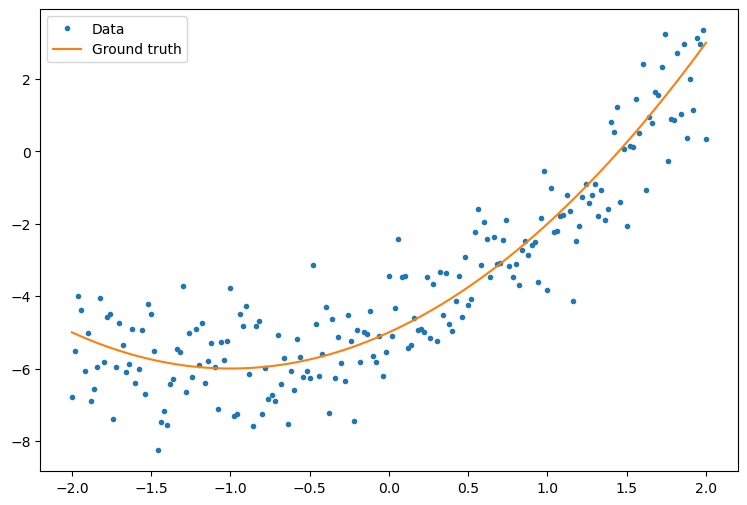

In [65]:
def f_example(x):
    y = x**2 + 2*x - 5
    return y

matplotlib.rcParams['figure.figsize'] = [9, 6]

x = tf.linspace(-2, 2, 201)
# Transform the initially untyped x to a tf.float32 
x = tf.cast(x, tf.float32) 

y = f_example(x) + tf.random.normal(shape=[201])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f_example(x), label='Ground truth')
plt.legend();